In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
class GridWorld:
    """Simple grid world environment for TD learning."""

    def __init__(self, size=5):
        self.size = size
        self.goal = (size-1, size-1)
        self.start = (0, 0)
        self.reset()

    def reset(self):
        """Reset environment to starting state."""
        self.position = self.start
        return self.position

    def step(self, action):
        """
        Take an action and return next state, reward, and done flag.
        Actions: 0=up, 1=right, 2=down, 3=left
        """
        x, y = self.position

        # Update position based on action
        if action == 0 and x > 0:  # up
            x -= 1
        elif action == 1 and y < self.size - 1:  # right
            y += 1
        elif action == 2 and x < self.size - 1:  # down
            x += 1
        elif action == 3 and y > 0:  # left
            y -= 1

        self.position = (x, y)

        # Reward structure
        if self.position == self.goal:
            reward = 10.0
            done = True
        else:
            reward = -0.1  # Small penalty for each step
            done = False

        return self.position, reward, done

    def get_possible_actions(self):
        """Return list of possible actions from current state."""
        return [0, 1, 2, 3]

In [3]:
class TD0Agent:
    """Agent using TD(0) algorithm for value estimation."""

    def __init__(self, alpha=0.1, gamma=0.9, epsilon=0.1):
      
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.V = defaultdict(float)  # State value function
        self.visit_counts = defaultdict(int)

    def get_value(self, state):
        """Get value of a state."""
        return self.V[state]

In [4]:
def choose_action(self, env):
    """Choose action using epsilon-greedy policy based on value estimates."""
    if np.random.random() < self.epsilon:
        # Explore: random action
        return np.random.choice(env.get_possible_actions())
    else:
        # Exploit: choose action that leads to highest value state
        return self.greedy_action(env)

def greedy_action(self, env):
    """Choose greedy action based on value function."""
    current_pos = env.position
    actions = env.get_possible_actions()
    best_action = actions[0]
    best_value = float('-inf')

    for action in actions:
        # Simulate next state
        next_state = self.simulate_next_state(env.position, action, env.size)
        value = self.get_value(next_state)

        if value > best_value:
            best_value = value
            best_action = action

    return best_action

def simulate_next_state(self, position, action, size):
    """Simulate what the next state would be given an action."""
    x, y = position

    if action == 0 and x > 0:  # up
        x -= 1
    elif action == 1 and y < size - 1:  # right
        y += 1
    elif action == 2 and x < size - 1:  # down
        x += 1
    elif action == 3 and y > 0:  # left
        y -= 1

    return (x, y)

# Add these methods to TD0Agent class
TD0Agent.choose_action = choose_action
TD0Agent.greedy_action = greedy_action
TD0Agent.simulate_next_state = simulate_next_state

In [5]:
def td_update(self, state, reward, next_state, done):

    # Current value estimate
    current_value = self.V[state]

    # Next state value (0 if terminal)
    next_value = 0.0 if done else self.V[next_state]

    # TD error (temporal difference)
    td_error = reward + self.gamma * next_value - current_value

    # Update value function
    self.V[state] = current_value + self.alpha * td_error

    # Track visits
    self.visit_counts[state] += 1

    return td_error

# Add this method to TD0Agent class
TD0Agent.td_update = td_update

In [6]:
def train_td0(episodes=1000, max_steps=100, verbose=True):
 
    env = GridWorld(size=5)
    agent = TD0Agent(alpha=0.1, gamma=0.9, epsilon=0.1)

    # Statistics
    episode_rewards = []
    episode_lengths = []
    td_errors = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        episode_td_errors = []

        for step in range(max_steps):
            # Choose and take action
            action = agent.choose_action(env)
            next_state, reward, done = env.step(action)

            # TD(0) update
            td_error = agent.td_update(state, reward, next_state, done)

            total_reward += reward
            episode_td_errors.append(abs(td_error))
            state = next_state

            if done:
                break

        episode_rewards.append(total_reward)
        episode_lengths.append(step + 1)
        td_errors.append(np.mean(episode_td_errors))

        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            print(f"Episode {episode + 1}/{episodes} - "
                  f"Avg Reward: {avg_reward:.2f}, Avg Length: {avg_length:.2f}")

    stats = {
        'episode_rewards': episode_rewards,
        'episode_lengths': episode_lengths,
        'td_errors': td_errors
    }

    return agent, env, stats

In [7]:
def visualize_value_function(agent, env):
    """Visualize the learned value function as a heatmap."""
    values = np.zeros((env.size, env.size))

    for i in range(env.size):
        for j in range(env.size):
            values[i, j] = agent.get_value((i, j))

    plt.figure(figsize=(8, 6))
    plt.imshow(values, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='State Value')
    plt.title('Learned Value Function (TD(0))')
    plt.xlabel('Column')
    plt.ylabel('Row')

    # Mark start and goal
    plt.plot(env.start[1], env.start[0], 'wo', markersize=15, label='Start')
    plt.plot(env.goal[1], env.goal[0], 'r*', markersize=20, label='Goal')
    plt.legend()

    # Add value annotations
    for i in range(env.size):
        for j in range(env.size):
            plt.text(j, i, f'{values[i, j]:.1f}',
                    ha='center', va='center', color='white', fontsize=8)

    plt.tight_layout()
    plt.show()

In [8]:
def visualize_training_stats(stats):
    """Visualize training statistics."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Episode rewards
    axes[0].plot(stats['episode_rewards'], alpha=0.3)
    axes[0].plot(np.convolve(stats['episode_rewards'],
                             np.ones(50)/50, mode='valid'),
                label='50-episode average')
    axes[0].set_xlabel('Episode')
    axes[0].set_ylabel('Total Reward')
    axes[0].set_title('Episode Rewards')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Episode lengths
    axes[1].plot(stats['episode_lengths'], alpha=0.3)
    axes[1].plot(np.convolve(stats['episode_lengths'],
                             np.ones(50)/50, mode='valid'),
                label='50-episode average')
    axes[1].set_xlabel('Episode')
    axes[1].set_ylabel('Steps')
    axes[1].set_title('Episode Lengths')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # TD errors
    axes[2].plot(stats['td_errors'], alpha=0.3)
    axes[2].plot(np.convolve(stats['td_errors'],
                             np.ones(50)/50, mode='valid'),
                label='50-episode average')
    axes[2].set_xlabel('Episode')
    axes[2].set_ylabel('Average |TD Error|')
    axes[2].set_title('TD Errors Over Time')
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [9]:
def demonstrate_learned_policy(agent, env, max_steps=50):
    """Demonstrate the learned policy by running a greedy episode."""
    state = env.reset()
    path = [state]

    print("\nDemonstrating learned policy:")
    print(f"Start: {state}")

    for step in range(max_steps):
        action = agent.greedy_action(env)
        state, reward, done = env.step(action)
        path.append(state)

        action_names = ['UP', 'RIGHT', 'DOWN', 'LEFT']
        print(f"Step {step+1}: Action={action_names[action]}, "
              f"State={state}, Reward={reward:.2f}")

        if done:
            print(f"\nReached goal in {step+1} steps!")
            break

    return path

In [10]:
print("Training TD(0) Agent on GridWorld...")
print("=" * 50)

# Train the agent
agent, env, stats = train_td0(episodes=1000, max_steps=100, verbose=True)

print("\n" + "=" * 50)
print("Training complete!")

Training TD(0) Agent on GridWorld...
Episode 100/1000 - Avg Reward: 2.62, Avg Length: 53.55
Episode 200/1000 - Avg Reward: 3.26, Avg Length: 48.23
Episode 300/1000 - Avg Reward: 2.64, Avg Length: 52.40
Episode 400/1000 - Avg Reward: 3.23, Avg Length: 49.51
Episode 500/1000 - Avg Reward: 3.80, Avg Length: 45.85
Episode 600/1000 - Avg Reward: 2.63, Avg Length: 51.49
Episode 700/1000 - Avg Reward: 3.47, Avg Length: 47.15
Episode 800/1000 - Avg Reward: 3.48, Avg Length: 50.06
Episode 900/1000 - Avg Reward: 3.63, Avg Length: 49.60
Episode 1000/1000 - Avg Reward: 3.41, Avg Length: 48.75

Training complete!


In [11]:
# Demonstrate learned policy
path = demonstrate_learned_policy(agent, env)


Demonstrating learned policy:
Start: (0, 0)
Step 1: Action=RIGHT, State=(0, 1), Reward=-0.10
Step 2: Action=DOWN, State=(1, 1), Reward=-0.10
Step 3: Action=RIGHT, State=(1, 2), Reward=-0.10
Step 4: Action=DOWN, State=(2, 2), Reward=-0.10
Step 5: Action=DOWN, State=(3, 2), Reward=-0.10
Step 6: Action=RIGHT, State=(3, 3), Reward=-0.10
Step 7: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 8: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 9: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 10: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 11: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 12: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 13: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 14: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 15: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 16: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 17: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 18: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 19: Action=RIGHT, State=(3, 4), Reward=-0.10
Step 20: Action=R


Generating visualizations...


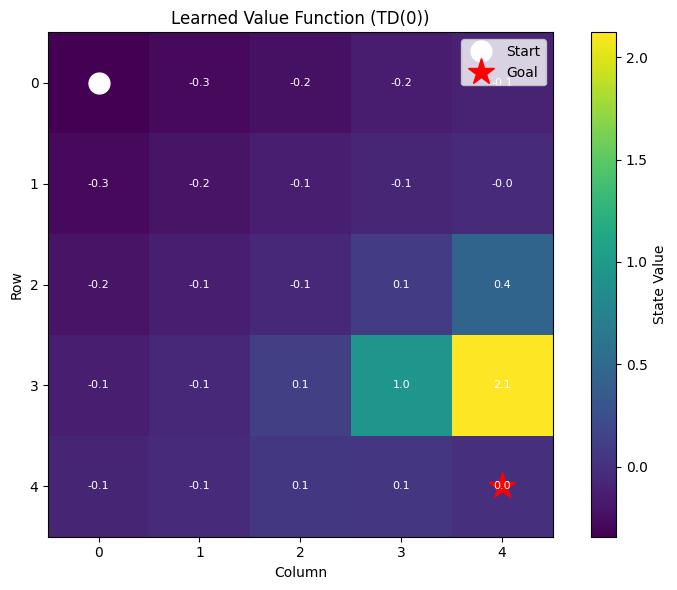

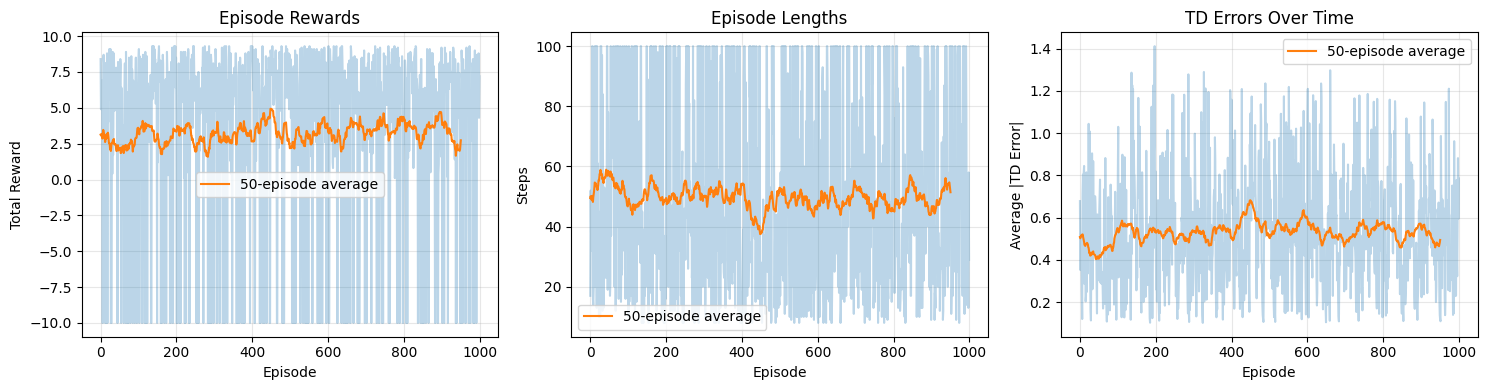

In [12]:
# Visualize results
print("\nGenerating visualizations...")
visualize_value_function(agent, env)
visualize_training_stats(stats)

In [13]:
# Print some final statistics
print("\n" + "=" * 50)
print("Final Statistics:")
print(f"Goal state value: {agent.get_value(env.goal):.2f}")
print(f"Start state value: {agent.get_value(env.start):.2f}")
print(f"Average reward (last 100 episodes): {np.mean(stats['episode_rewards'][-100:]):.2f}")
print(f"Average episode length (last 100 episodes): {np.mean(stats['episode_lengths'][-100:]):.2f}")


Final Statistics:
Goal state value: 0.00
Start state value: -0.34
Average reward (last 100 episodes): 3.41
Average episode length (last 100 episodes): 48.75



State Visit Analysis:

Top 10 Most Visited States:
  State (4, 3): 15218 visits, Value: 0.05
  State (3, 4): 14408 visits, Value: 2.12
  State (3, 3): 5918 visits, Value: 0.95
  State (4, 2): 2460 visits, Value: 0.06
  State (2, 4): 2251 visits, Value: 0.45
  State (3, 2): 1686 visits, Value: 0.13
  State (2, 3): 1154 visits, Value: 0.10
  State (0, 0): 1078 visits, Value: -0.34
  State (1, 0): 725 visits, Value: -0.28
  State (2, 2): 681 visits, Value: -0.07


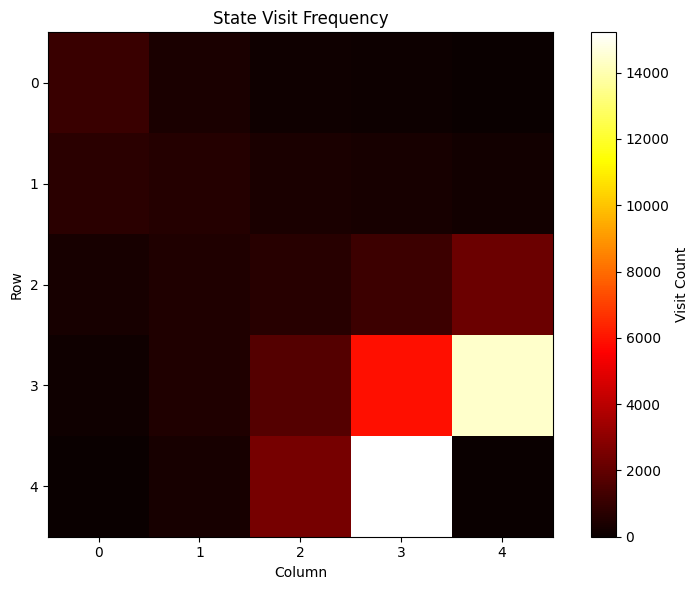

In [14]:
# Analyze which states were visited most frequently
print("\n" + "=" * 50)
print("State Visit Analysis:")
print("=" * 50)

# Get top 10 most visited states
sorted_states = sorted(agent.visit_counts.items(), 
                       key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Most Visited States:")
for state, count in sorted_states:
    value = agent.get_value(state)
    print(f"  State {state}: {count} visits, Value: {value:.2f}")

# Visualize visit counts
visit_grid = np.zeros((env.size, env.size))
for (i, j), count in agent.visit_counts.items():
    visit_grid[i, j] = count

plt.figure(figsize=(8, 6))
plt.imshow(visit_grid, cmap='hot', interpolation='nearest')
plt.colorbar(label='Visit Count')
plt.title('State Visit Frequency')
plt.xlabel('Column')
plt.ylabel('Row')
plt.tight_layout()
plt.show()


Learning Rate Comparison

Training with α=0.01...
  Final avg reward: 4.84

Training with α=0.1...
  Final avg reward: 3.23

Training with α=0.3...
  Final avg reward: 3.23

Training with α=0.5...
  Final avg reward: 3.83


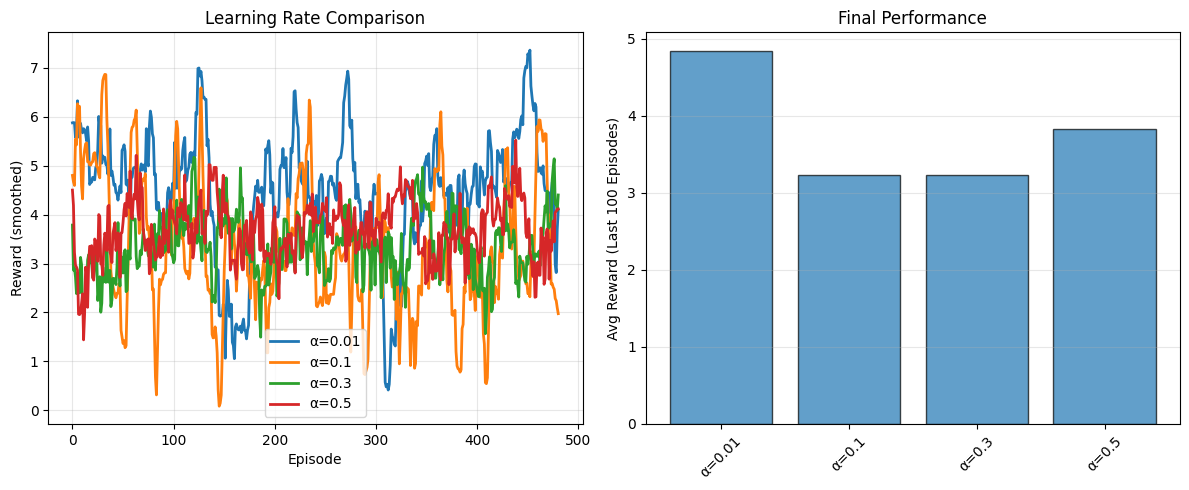

In [15]:
# Compare different learning rates
print("\n" + "=" * 50)
print("Learning Rate Comparison")
print("=" * 50)

alphas = [0.01, 0.1, 0.3, 0.5]
results = {}

for alpha in alphas:
    print(f"\nTraining with α={alpha}...")
    env_test = GridWorld(size=5)
    agent_test = TD0Agent(alpha=alpha, gamma=0.9, epsilon=0.1)
    
    # Quick training
    episode_rewards = []
    for episode in range(500):
        state = env_test.reset()
        total_reward = 0
        
        for step in range(100):
            action = agent_test.choose_action(env_test)
            next_state, reward, done = env_test.step(action)
            agent_test.td_update(state, reward, next_state, done)
            total_reward += reward
            state = next_state
            if done:
                break
        
        episode_rewards.append(total_reward)
    
    results[f'α={alpha}'] = episode_rewards
    avg_final = np.mean(episode_rewards[-100:])
    print(f"  Final avg reward: {avg_final:.2f}")

# Plot comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, rewards in results.items():
    smoothed = np.convolve(rewards, np.ones(20)/20, mode='valid')
    plt.plot(smoothed, label=name, linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Reward (smoothed)')
plt.title('Learning Rate Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
final_perfs = [np.mean(rewards[-100:]) for rewards in results.values()]
plt.bar(results.keys(), final_perfs, alpha=0.7, edgecolor='black')
plt.ylabel('Avg Reward (Last 100 Episodes)')
plt.title('Final Performance')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()